In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import StackingClassifier


import pickle
import warnings 
warnings.simplefilter('ignore')

In [2]:
loan = pd.read_csv(r'F:\DOWNLOADS\loan_approval_dataset.csv')

In [3]:
loan

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [4]:
loan.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
loan.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [6]:
loan.sample(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
967,968,4,Not Graduate,No,500000,1800000,20,777,900000,300000,1300000,200000,Approved
1127,1128,4,Graduate,No,9600000,25500000,20,544,4000000,11400000,23800000,11100000,Rejected
159,160,3,Graduate,Yes,4000000,10600000,10,318,1500000,5100000,8000000,4900000,Rejected
2223,2224,3,Graduate,No,2500000,9300000,4,810,2700000,3300000,9400000,3700000,Approved
1401,1402,3,Graduate,Yes,4900000,14300000,14,439,10300000,5600000,17400000,5100000,Rejected


In [7]:
loan.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [9]:
loan.describe(include='all')

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269,4269,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Graduate,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved
freq,NaN,NaN,2144,2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2656
mean,2135.000000,2.498712,NaN,NaN,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,NaN
std,1232.498479,1.695910,NaN,NaN,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,NaN
min,1.000000,0.000000,NaN,NaN,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,NaN
25%,1068.000000,1.000000,NaN,NaN,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,NaN
50%,2135.000000,3.000000,NaN,NaN,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,NaN
75%,3202.000000,4.000000,NaN,NaN,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,NaN


In [10]:
loan.size

55497

In [11]:
loan.shape

(4269, 13)

In [12]:
loan.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [13]:
loan.duplicated().sum()

0

In [14]:
loan1 = loan[[' no_of_dependents', ' education', ' self_employed',' income_annum', ' loan_amount', ' loan_term', ' cibil_score',' residential_assets_value', ' commercial_assets_value',' luxury_assets_value', ' bank_asset_value', ' loan_status']]

In [15]:
loan.head(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


array([[<Axes: title={'center': 'loan_id'}>,
        <Axes: title={'center': ' no_of_dependents'}>,
        <Axes: title={'center': ' income_annum'}>],
       [<Axes: title={'center': ' loan_amount'}>,
        <Axes: title={'center': ' loan_term'}>,
        <Axes: title={'center': ' cibil_score'}>],
       [<Axes: title={'center': ' residential_assets_value'}>,
        <Axes: title={'center': ' commercial_assets_value'}>,
        <Axes: title={'center': ' luxury_assets_value'}>],
       [<Axes: title={'center': ' bank_asset_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

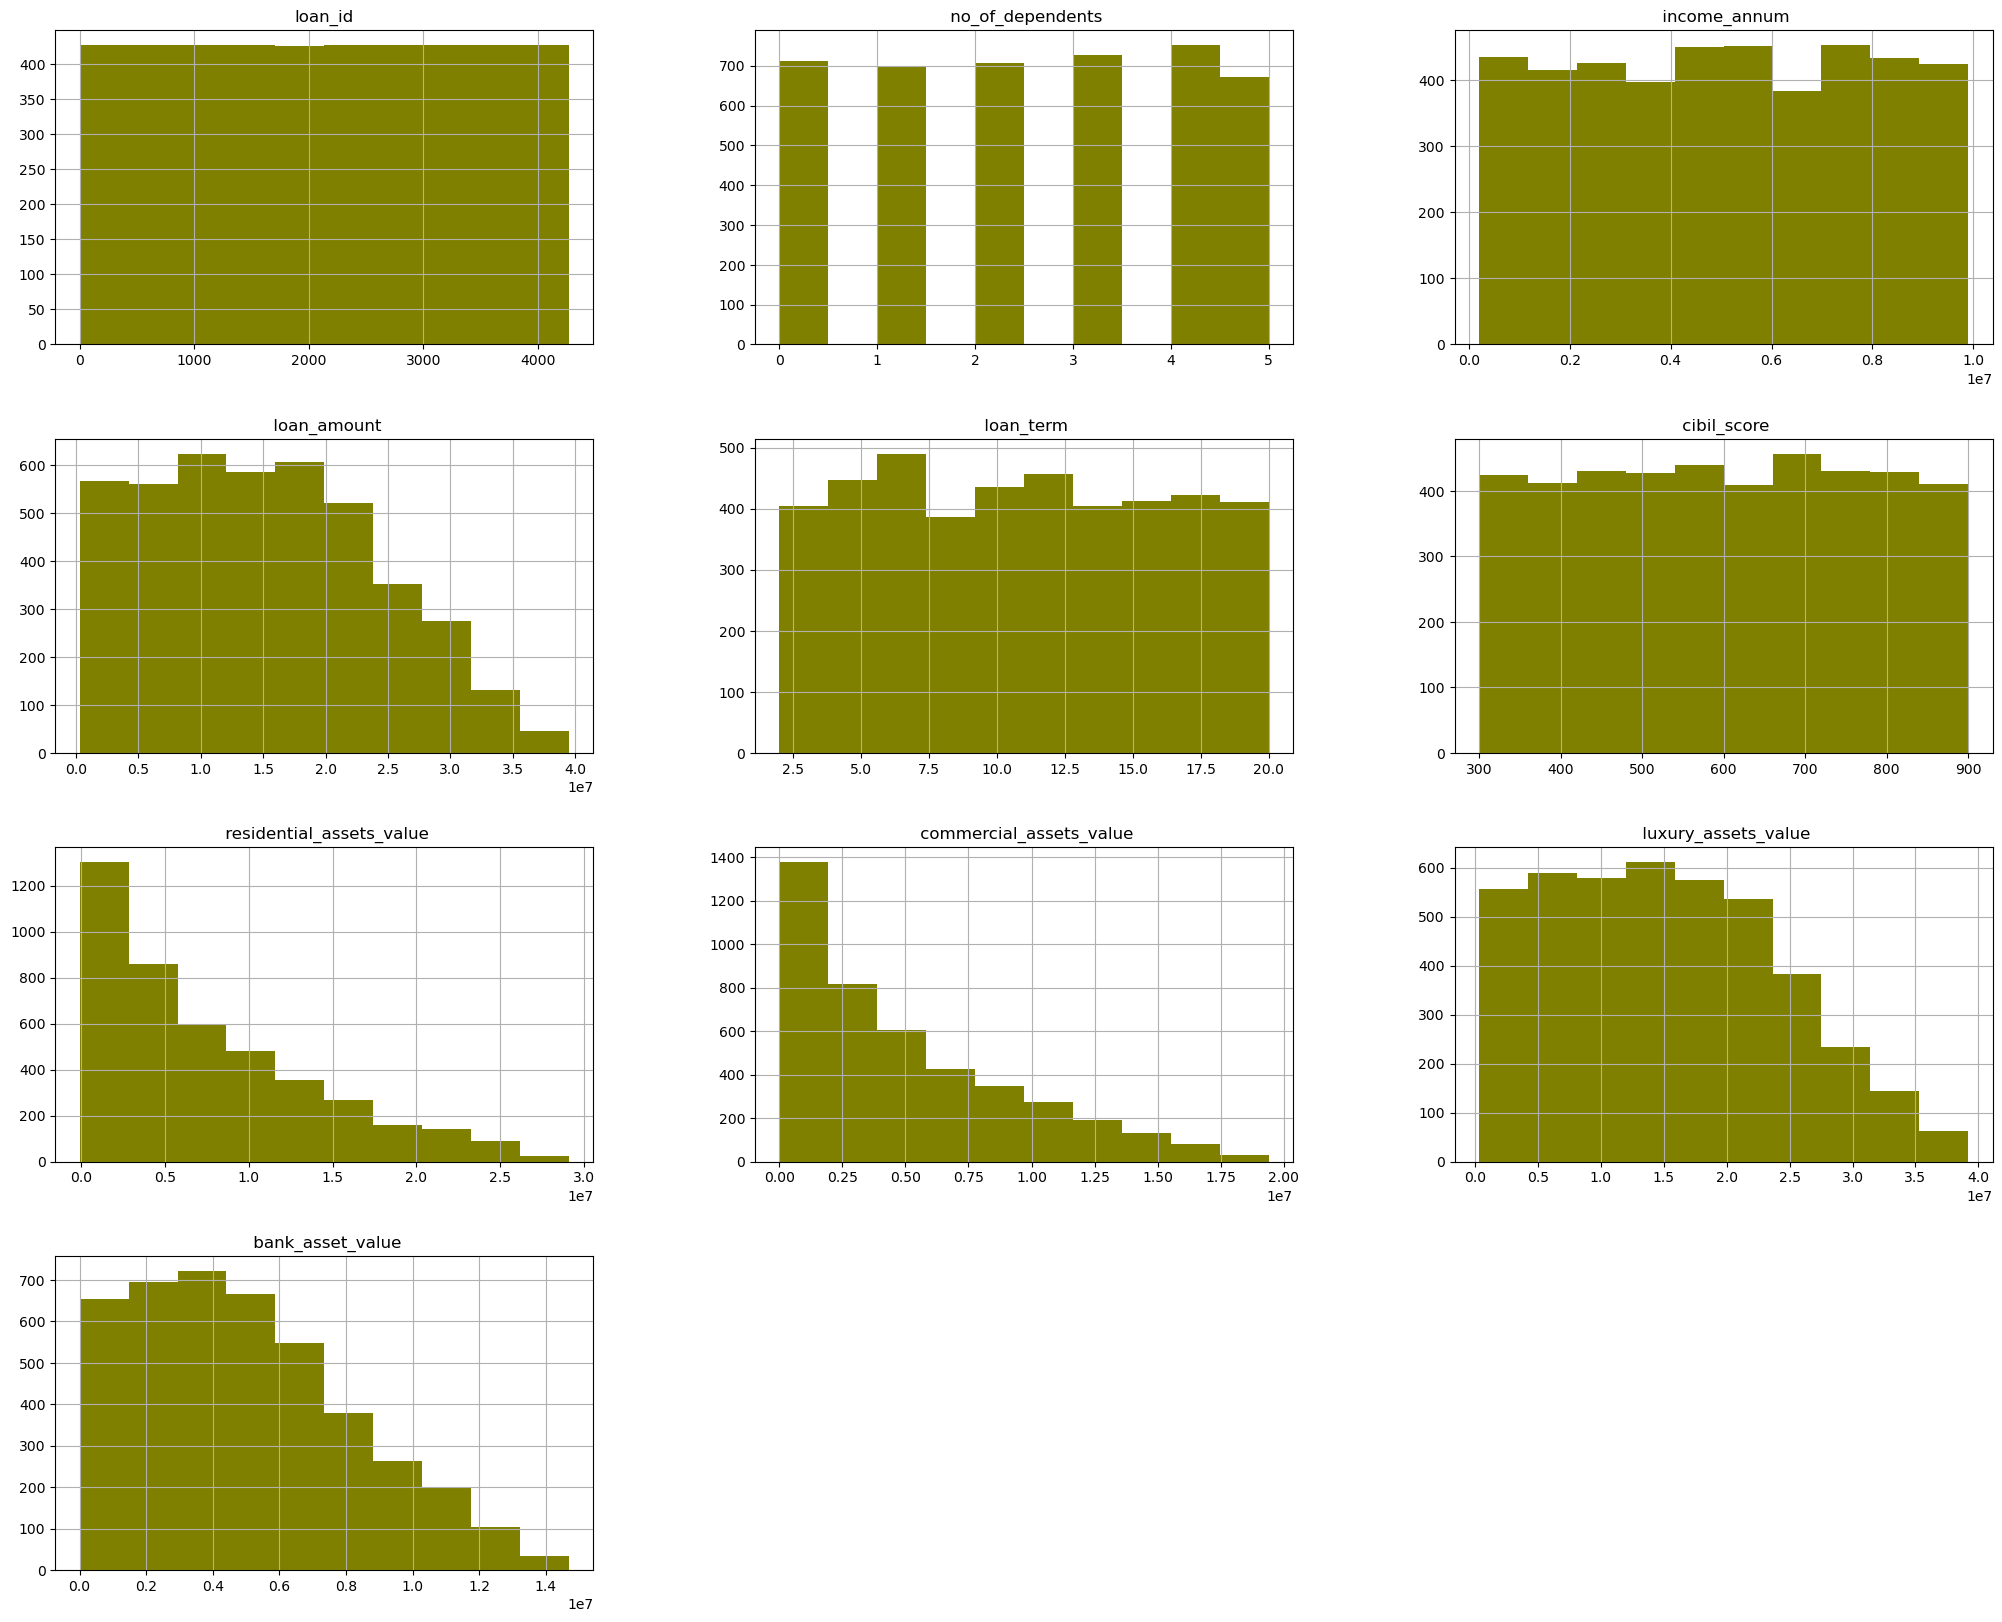

In [16]:
loan.hist(figsize=(25,20),color="olive")

In [17]:
a = loan[' education'].unique()
print(a)
b = loan[' self_employed'].unique()
print(b)

[' Graduate' ' Not Graduate']
[' No' ' Yes']


In [18]:
encoder = LabelEncoder()
loan[' education']=encoder.fit_transform(loan[' education'])
loan[' education']

loan[' self_employed']=encoder.fit_transform(loan[' self_employed'])
loan[' self_employed']

loan[' loan_status']=encoder.fit_transform(loan[' loan_status'])
loan[' loan_status']


0       0
1       1
2       1
3       1
4       1
       ..
4264    1
4265    0
4266    1
4267    0
4268    0
Name:  loan_status, Length: 4269, dtype: int32

In [19]:
loan.head(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [20]:
x = loan[[' no_of_dependents',' education',' self_employed',' income_annum', ' loan_amount', ' loan_term', ' cibil_score',' residential_assets_value', ' commercial_assets_value',' luxury_assets_value', ' bank_asset_value']]
y = loan[' loan_status']

In [21]:
x.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000


In [22]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name:  loan_status, dtype: int32

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [24]:
cv = CountVectorizer()

In [25]:
x_train_cv = cv.fit_transform(x_train)
x_test_cv = cv.transform(x_test)

In [26]:
print(x_train_cv)

  (0, 8)	1
  (1, 3)	1
  (2, 10)	1
  (3, 4)	1
  (4, 5)	1
  (5, 6)	1
  (6, 1)	1
  (7, 9)	1
  (8, 2)	1
  (9, 7)	1
  (10, 0)	1


In [27]:
loan = LogisticRegression()

In [28]:
loan.fit(x_train,y_train)
prediction_train = loan.predict(x_train)

In [29]:
x_train_cv

<11x11 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [30]:
x_test

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1703,5,0,0,5400000,19700000,20,423,6500000,10000000,15700000,7300000
1173,2,0,0,5900000,14000000,8,599,4700000,9500000,17800000,6700000
308,3,0,0,9600000,19900000,14,452,4200000,16200000,28500000,6600000
1322,2,0,0,6200000,23400000,8,605,10000000,10800000,21800000,9200000
3271,3,1,1,5800000,14100000,12,738,11700000,4400000,15400000,8400000
...,...,...,...,...,...,...,...,...,...,...,...
1097,0,1,1,5100000,14500000,14,559,11000000,1100000,12300000,6000000
1860,3,0,0,5000000,17600000,8,303,6300000,9600000,12800000,6900000
48,3,1,0,5500000,20500000,12,634,800000,8600000,18500000,8200000
2691,1,1,1,5300000,18500000,6,501,6700000,8600000,16600000,4300000


In [31]:
x_train

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
921,3,1,1,2100000,6100000,8,346,5500000,600000,4500000,2900000
3119,4,1,0,9800000,29400000,8,592,29100000,16700000,35900000,9000000
3975,2,0,1,6100000,22300000,8,694,16200000,10900000,22900000,7200000
756,1,1,1,4700000,18700000,20,445,2100000,0,11100000,4000000
2763,3,1,1,4600000,13600000,20,729,1300000,8900000,17200000,5900000
...,...,...,...,...,...,...,...,...,...,...,...
3444,0,0,1,1300000,4700000,16,530,3200000,1000000,3800000,800000
466,5,1,1,500000,1800000,18,411,1000000,500000,1300000,200000
3092,4,1,1,8600000,20600000,16,449,10800000,10600000,28700000,5400000
3772,2,1,1,7000000,21400000,12,541,3700000,1300000,19800000,9600000


In [32]:
print(accuracy_score(y_train,prediction_train)*100)

73.6013986013986


In [33]:
prediction_test = loan.predict(x_test)

In [34]:
print(accuracy_score(y_test,prediction_test)*100)

72.46273953158268


In [35]:
print(loan.predict([[3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000]]))

[1]


In [36]:
with open('loan.pickle','wb') as f:
    pickle.dump(loan,f)

In [37]:
with open('loan.pickle','rb') as f:
    load_file = pickle.load(f)
    print(load_file)

LogisticRegression()
